In [ ]:
# to mount the drive into the system 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize
from sklearn.manifold import TSNE

class tsneKmeanClustering: 
  def __init__(self, NumberofClusters, dataframeX):
    self.numberofclusters = NumberofClusters
    self.initialdataframe = dataframeX
    self.initialdataframe 
    tempdataframe = dataframeX[['FGA', 'FG%', 'FG', '3P', '3PA', '3P%', '2P', 
                                '2PA', '2P%', 'FT', 'FTA', 
                                'FT%', 'AST', 'STL', 'BLK', 'ORB', 'DRB']].fillna(0)
    self.newdataframe = scale(tempdataframe) 

  def Dimreduction(self): 
    # to perform the dimension reduction 
    rawdata = self.newdataframe
    # to perform tsne reduction
    self.scaletsne = TSNE(n_components=2).fit_transform(rawdata) 
    tempred = self.scaletsne
    # the dimension reduction must be fixed
    plt.figure(figsize=(14, 10))
    plt.scatter(tempred[:,0], tempred[:, 1], color = 'red')
    plt.xlabel("Reduction Dimension 1")
    plt.ylabel("Reduction Dimension 2")
    plt.grid(True) 

  def Kmeancluster(self): 
    # to cluster the data 
    # the default number of clusters is 4
    twodimdata = self.scaletsne
    dataframeK =  self.initialdataframe
    clustermodel = KMeans(n_clusters = self.numberofclusters, init = "random", n_init = 100)
    label = clustermodel.fit_predict(twodimdata)
    # to store all important data into a dataframe 
    DFtsned = {'dimension 1': twodimdata[:,0],'dimension 2': twodimdata[:,1], 
               'label': label, 'team': dataframeK['Team'], 'name': dataframeK['Name']}
    df_tsned = pd.DataFrame(data=DFtsned)
    df_tsned2 = df_tsned.sort_values(by=['label'])
    self.clusters = df_tsned2
    plt.figure(figsize=(14, 10))
    plt.scatter(twodimdata[:,0], twodimdata[:, 1], c = label)
    plt.xlabel("Reduction Dimension 1")
    plt.ylabel("Reduction Dimension 2")
    plt.grid(True)  
    plt.title('Cluster Formation, based upon tsne reduction algorithm')
    self.centre = clustermodel.cluster_centers_


  def CalculateclusterCenres(self ):
    clusterformation = self.clusters  
    centres = self.centre
    # to create two empty clusters 
    medoidx = []
    medoidy = [] 
    L = centres.shape[0] 
    for i in range(L): 
      medoidx.append(centres[i, 0])
      medoidy.append(centres[i, 1])
    return np.array([medoidx, medoidy]) 

  def Ateam(self, teamname="San Antonio"): 
    # to pick out the result from one specific team 
    clusters = self.clusters 
    group_team = clusters.groupby(clusters.team)
    newframe = group_team.get_group(teamname) 
    labels = newframe['label']
    teamformation = newframe
    return teamformation

  def AverageEuclidean(self, teamname="San Antonio"):
    # to calculate the average Euclidean distances between the centroids and the players 
    # in each group, try to produce figure 6,4 in California report 
    teamstat = self.Ateam(teamname = teamname)
    centres =  self.CalculateclusterCenres( )
    currentlabels = teamstat['label'].unique()
    centrex = centres[0]
    centrey = centres[1] 

    # to divide the team into a number of clusters again
    group_clusters = teamstat.groupby(teamstat.label) 
    diffpath=[] # to create an empty vector, storing all path differences
    NumberofClusters = self.numberofclusters
    for i in currentlabels:
      currentcentroid = np.array((centrex[i], centrey[i])) 
      currentlabel = group_clusters.get_group(i) 
      dim1 = currentlabel['dimension 1'].tolist()
      dim2 = currentlabel['dimension 2'].tolist() 
      for k in range(len(dim1)):
        currentplayer = np.array((dim1[k], dim2[k])) 
        diffpath.append( np.linalg.norm(currentplayer - currentcentroid)) 

    return (np.sum(diffpath)/len(diffpath)) 


(434, 31)


array([[  5.2897277,   0.726437 ,   8.812382 , -13.720064 ],
       [-17.160252 ,  11.544911 ,  -3.7525244,   7.0156937]],
      dtype=float32)

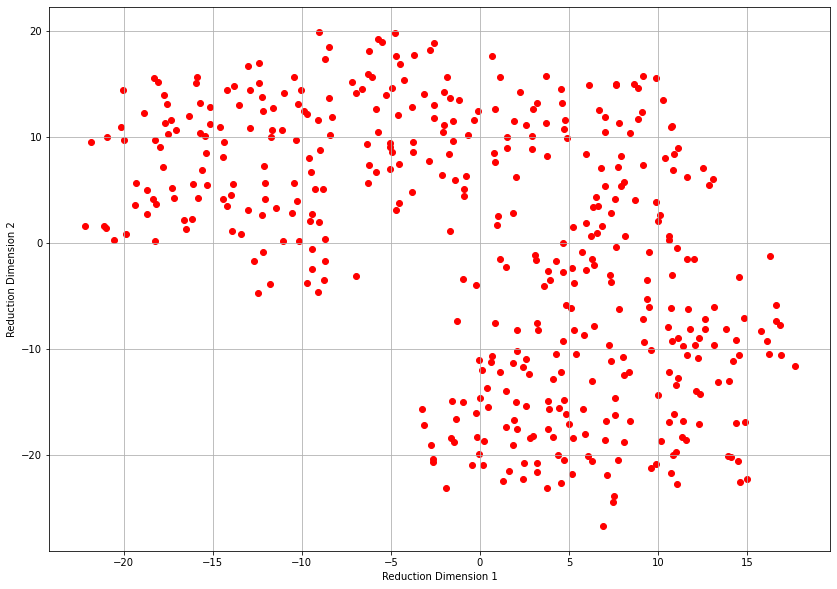

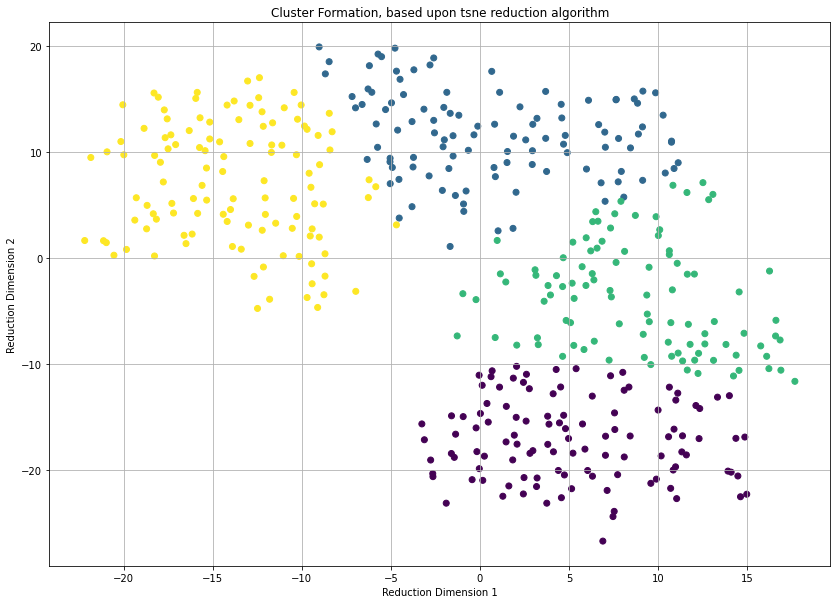

In [ ]:
df_season9900 = pd.read_csv('/content/drive/MyDrive/SportAnalytics/Season_99_00/100poss.csv')
print(df_season9900.shape)
newsim =  tsneKmeanClustering(NumberofClusters=4, dataframeX =df_season9900)
newsim.Dimreduction()
newsim.Kmeancluster()
newsim.CalculateclusterCenres()

Text(0.5, 1.0, 'Average Distance between Each Player and the Centroids, Season 1999/2000')

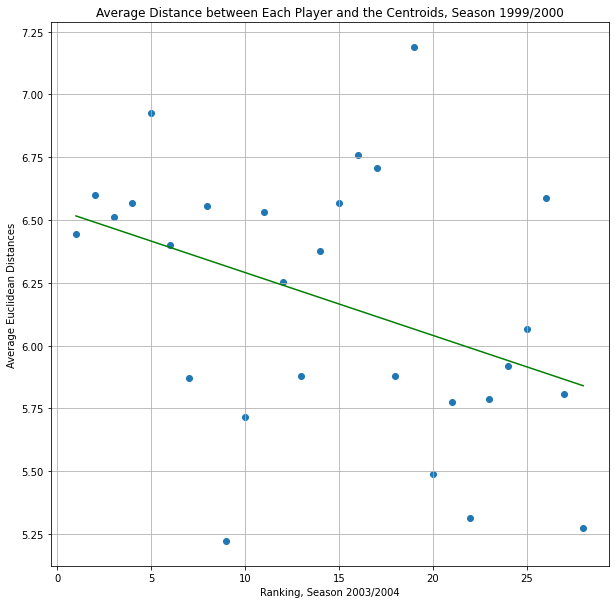

In [ ]:
from sklearn.linear_model import LinearRegression 

team_ranking=[  'LALakers', 'Indiana', 'NewYork', 'Utah', 'Philadelphia', 'Miami', 'Portland', 'SanAntonio', 'Sacramento', 
                'Minnesota', 'NewJersey', 'Detroit',  'Houston',   'Goldenstate', 'Milwaukee', 'Cleveland',
              'Denver',    'Houston', 'Toronto', 'Charlotte',    'Seattle',  'Vancouver',  'Orlando',
               'Atlanta', 'LAClippers',  'Washington',  'Phoenix', 
                 'Chicago',]

rank = []
diffpath = [] 

L = len(team_ranking)

for i in range(L): 
  rank.append(i+1)
  current_team = team_ranking[i]
  # to calculate the average distance
  tempaverage = newsim.AverageEuclidean(teamname = current_team)
  diffpath.append(tempaverage)

rankarray = np.array(rank).reshape((-1, 1))
diffarray = np.array(diffpath)
reg = LinearRegression().fit(rankarray, diffarray)

#LinearRegression().predict(rankarray)
ypred = reg.predict(rankarray)

plt.figure(figsize=(10, 10))
plt.scatter(rank, diffpath)
plt.plot( rank, ypred, color='green')
plt.xlabel("Ranking, Season 2003/2004")
plt.ylabel("Average Euclidean Distances")
plt.grid(True)
plt.title('Average Distance between Each Player and the Centroids, Season 1999/2000')

In [ ]:
newsim.Ateam(teamname="LALakers")

,dimension 1,dimension 2,label,team,name
194,11.587303,-18.588108,0,LALakers,Ron Harper
196,6.042696,-20.057362,0,LALakers,Derek Fisher
198,2.770785,-12.347701,0,LALakers,Rick Fox
199,11.331546,-18.303629,0,LALakers,Brian Shaw
203,9.901066,-20.869865,0,LALakers,John Celestand
204,9.998917,-14.360156,0,LALakers,Tyronn Lue
193,10.401195,7.987614,1,LALakers,Kobe Bryant
191,9.859196,15.549852,1,LALakers,Shaquille O'Neal
201,-0.224091,-3.947383,2,LALakers,Devean George
192,4.637789,-2.717357,2,LALakers,Glen Rice


[  5.2897277   0.726437    8.812382  -13.720064 ]
14


Text(0, 0.5, 'Reduction Dimension 2')

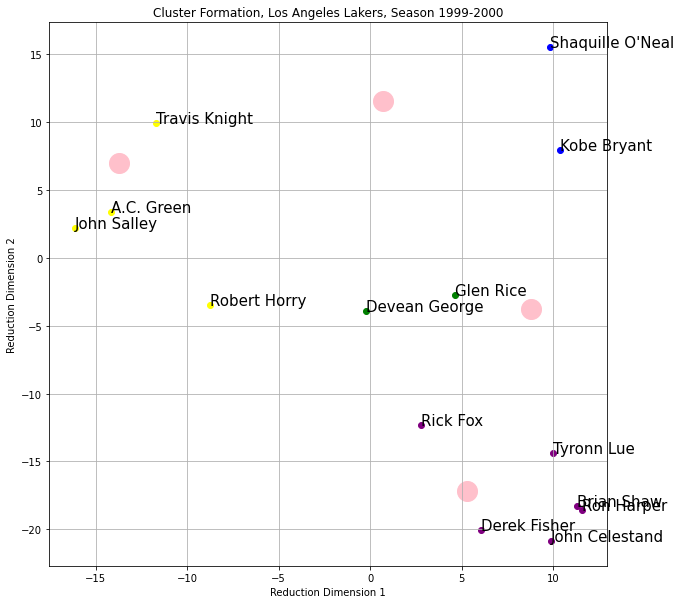

In [ ]:
colour = ['purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'blue', 'blue',
          'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow'] 

frame = newsim.Ateam(teamname="LALakers")

koord = newsim.CalculateclusterCenres()
print(koord[0,:] )

names = frame['name'].tolist()
dim1 = frame['dimension 1'].tolist()
dim2 = frame['dimension 2'].tolist()
labels = frame['label'].tolist()

l = len(names)
print(l)
plt.figure(figsize=(10, 10))
for i in range(4):
   plt.scatter(koord[0, i], koord[1, i], color = 'pink', s= 400)

for i in range(l):
  plt.scatter( dim1[i], dim2[i], color = colour[i])
  plt.text(dim1[i], dim2[i], names[i], fontsize=15)
  

plt.grid(True)
plt.title('Cluster Formation, Los Angeles Lakers, Season 1999-2000')
plt.xlabel("Reduction Dimension 1")
plt.ylabel("Reduction Dimension 2")          

In [ ]:
newsim.Ateam(teamname="Utah")

,dimension 1,dimension 2,label,team,name
388,7.137403,-21.935228,0,Utah,Scott Padgett
384,14.366793,-17.024580,0,Utah,Quincy Lewis
381,10.632059,-12.200259,0,Utah,Howard Eisley
377,10.281779,13.441992,1,Utah,Karl Malone
386,3.198777,13.142991,1,Utah,Armen Gilliam
385,12.240813,-10.906095,2,Utah,Jacque Vaughn
378,5.265936,-8.263578,2,Utah,Bryon Russell
379,14.823782,-7.118891,2,Utah,John Stockton
380,4.674645,0.000355,2,Utah,Jeff Hornacek
389,-12.158947,-0.874079,3,Utah,Pete Chilcutt


[  5.2897277   0.726437    8.812382  -13.720064 ]
13


Text(0, 0.5, 'Reduction Dimension 2')

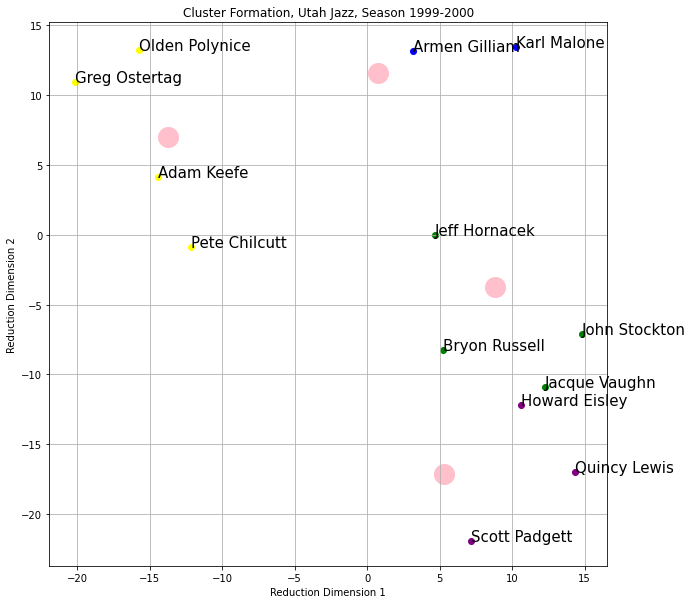

In [ ]:
colour = ['purple', 'purple', 'purple',  'blue', 'blue', 'green', 'green',
          'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow']  
      
frame = newsim.Ateam(teamname="Utah")

koord = newsim.CalculateclusterCenres()
print(koord[0,:] )

names = frame['name'].tolist()
dim1 = frame['dimension 1'].tolist()
dim2 = frame['dimension 2'].tolist()
labels = frame['label'].tolist()

l = len(names)
print(l)
plt.figure(figsize=(10, 10))
for i in range(4):
   plt.scatter(koord[0, i], koord[1, i], color = 'pink', s= 400)

for i in range(l):
  plt.scatter( dim1[i], dim2[i], color = colour[i])
  plt.text(dim1[i], dim2[i], names[i], fontsize=15)
  

plt.grid(True)
plt.title('Cluster Formation, Utah Jazz, Season 1999-2000')
plt.xlabel("Reduction Dimension 1")
plt.ylabel("Reduction Dimension 2")      

In [ ]:
newsim.Ateam(teamname="Indiana")

,dimension 1,dimension 2,label,team,name
164,8.430789,-16.804659,0,Indiana,Mark Jackson
172,0.247723,-18.705341,0,Indiana,Chris Mullin
169,-0.943179,-14.976637,0,Indiana,Sam Perkins
173,5.978853,8.360889,1,Indiana,Jonathan Bender
175,-2.597208,18.834118,1,Indiana,Jeff Foster
170,-2.113164,6.347534,1,Indiana,Al Harrington
167,6.092201,14.845287,1,Indiana,Rik Smits
162,3.601146,-4.101728,2,Indiana,Reggie Miller
163,5.961814,1.882282,2,Indiana,Jalen Rose
166,0.965845,1.630720,2,Indiana,Austin Croshere


[  5.2897277   0.726437    8.812382  -13.720064 ]
14


Text(0, 0.5, 'Reduction Dimension 2')

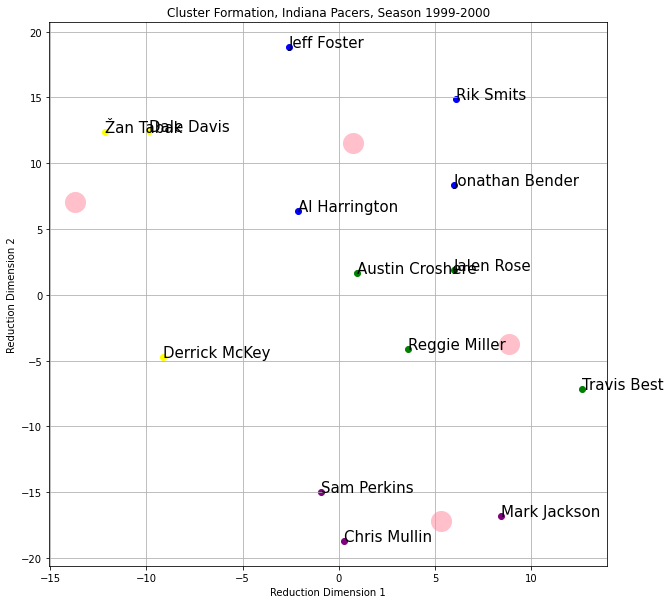

In [ ]:
colour=[ 'purple', 'purple', 'purple', 'blue', 'blue', 'blue', 'blue',  
        'green', 'green', 'green', 'green', 'yellow', 'yellow', 'yellow'] 
frame = newsim.Ateam(teamname="Indiana")

koord = newsim.CalculateclusterCenres()
print(koord[0,:] )

names = frame['name'].tolist()
dim1 = frame['dimension 1'].tolist()
dim2 = frame['dimension 2'].tolist()
labels = frame['label'].tolist()

l = len(names)
print(l)
plt.figure(figsize=(10, 10))
for i in range(4):
   plt.scatter(koord[0, i], koord[1, i], color = 'pink', s= 400)

for i in range(l):
  plt.scatter( dim1[i], dim2[i], color = colour[i])
  plt.text(dim1[i], dim2[i], names[i], fontsize=15)
  

plt.grid(True)
plt.title('Cluster Formation, Indiana Pacers, Season 1999-2000')
plt.xlabel("Reduction Dimension 1")
plt.ylabel("Reduction Dimension 2")

In [ ]:
newsim.Ateam(teamname="Miami")

,dimension 1,dimension 2,label,team,name
216,11.370262,-16.787807,0,Miami,Rex Walters
215,4.571214,-22.622787,0,Miami,Bruce Bowen
207,1.464011,-17.362352,0,Miami,Dan Majerle
210,8.093547,-12.491431,0,Miami,Tim Hardaway
212,1.098208,-12.196669,0,Miami,Voshon Lenard
206,9.145139,15.708398,1,Miami,Alonzo Mourning
213,-1.512856,11.504219,1,Miami,Otis Thorpe
214,-0.122958,12.401501,1,Miami,Mark Strickland
219,-9.029957,19.875774,1,Miami,Harold Jamison
205,6.217769,0.646602,2,Miami,Jamal Mashburn


[  5.2897277   0.726437    8.812382  -13.720064 ]
15


Text(0, 0.5, 'Reduction Dimension 2')

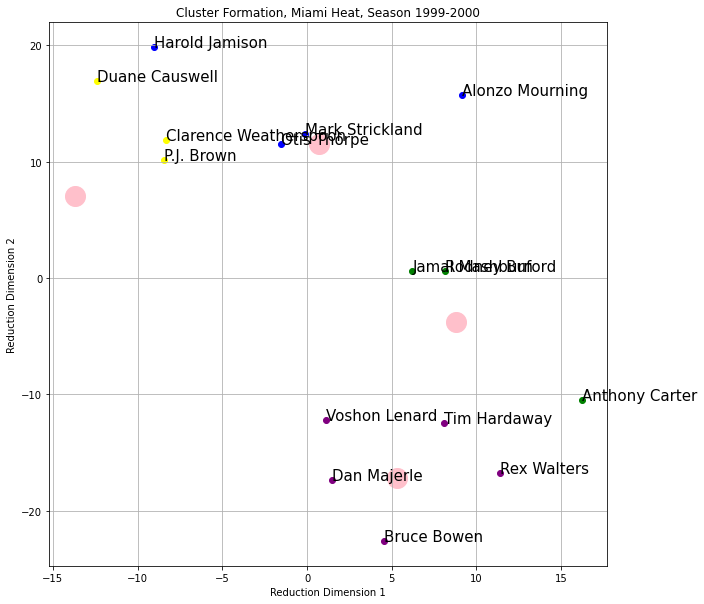

In [ ]:
colour = ['purple', 'purple', 'purple', 'purple', 'purple', 'blue', 
          'blue', 'blue', 'blue', 'green', 'green', 'green', 'yellow', 
          'yellow', 'yellow'] 
frame = newsim.Ateam(teamname="Miami")

koord = newsim.CalculateclusterCenres()
print(koord[0,:] )

names = frame['name'].tolist()
dim1 = frame['dimension 1'].tolist()
dim2 = frame['dimension 2'].tolist()
labels = frame['label'].tolist()

l = len(names)
print(l)
plt.figure(figsize=(10, 10))
for i in range(4):
   plt.scatter(koord[0, i], koord[1, i], color = 'pink', s= 400)

for i in range(l):
  plt.scatter( dim1[i], dim2[i], color = colour[i])
  plt.text(dim1[i], dim2[i], names[i], fontsize=15)
  

plt.grid(True)
plt.title('Cluster Formation, Miami Heat, Season 1999-2000')
plt.xlabel("Reduction Dimension 1")
plt.ylabel("Reduction Dimension 2")

array([[  2.0699615, -14.724056 ,  11.030291 ,  -3.4570847],
       [-10.206031 ,  -6.4672456,   8.846848 ,   5.145595 ]],
      dtype=float32)

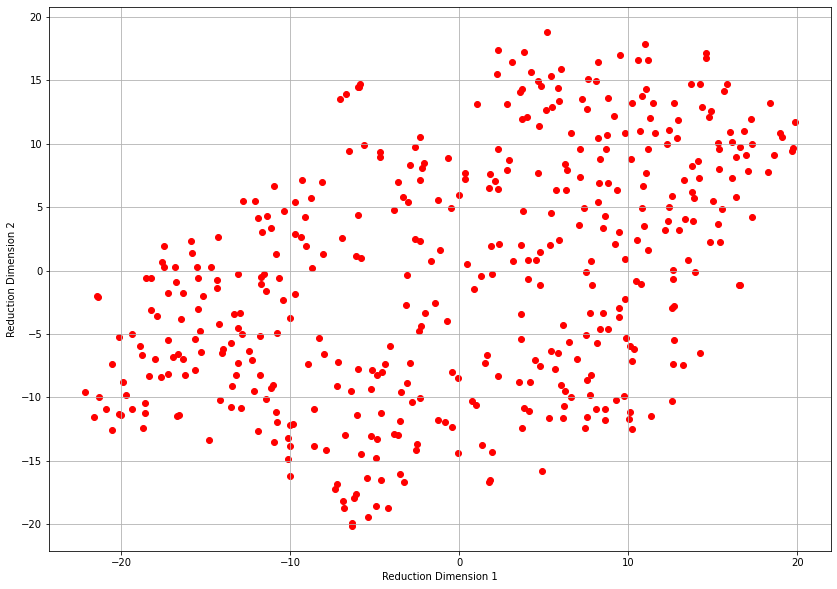

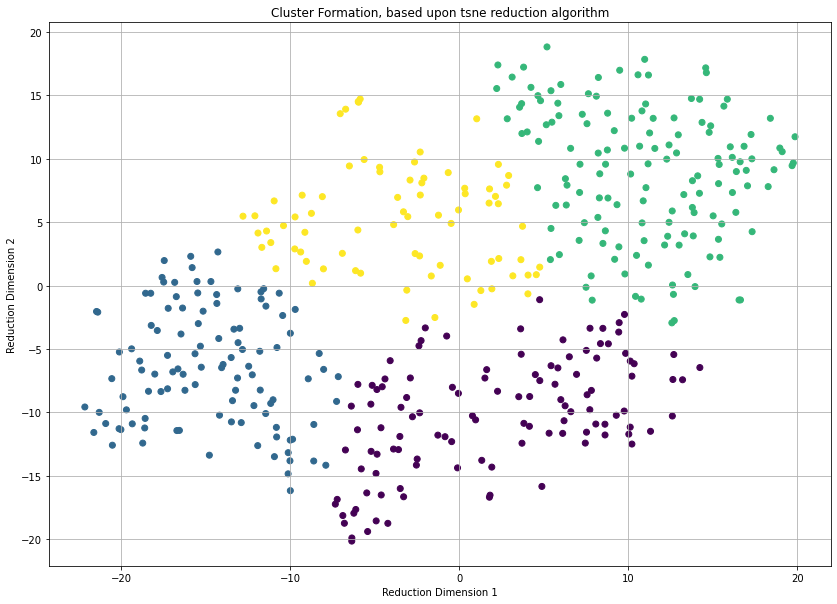

In [ ]:
df_season0304 = pd.read_csv('/content/drive/MyDrive/SportAnalytics/season20032004_100poss/100poss.csv')
newsim =  tsneKmeanClustering(NumberofClusters=4, dataframeX =df_season0304)
newsim.Dimreduction()
newsim.Kmeancluster()
newsim.CalculateclusterCenres()

Text(0.5, 1.0, 'Average Distance between Each Player and the Centroids, Season 2003/2004')

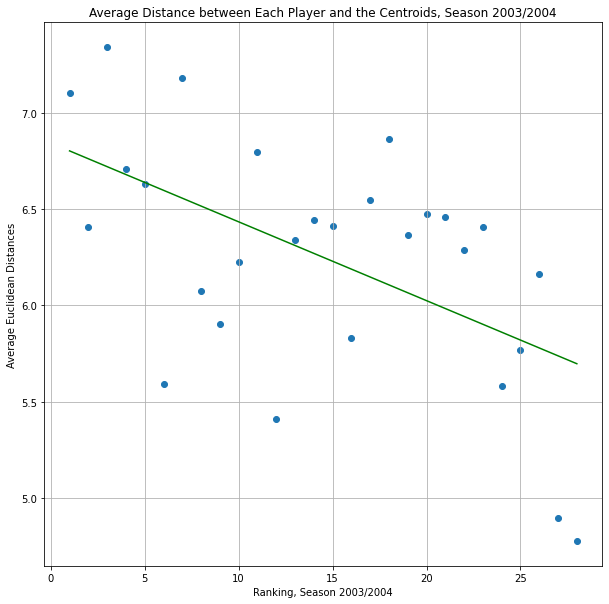

In [ ]:
from sklearn.linear_model import LinearRegression 

team_ranking=[  'Detroit', 'LAL', 'Portland','Indiana', 'Minnesota',  'Boston', 'San Antonio', 'Dallas', 
              'New Orleans',  'New Jersey', 'Denver', 'Houston', 'Toronto', 'Memphis', 'Utah',  
              'GoldenState',   'Chicago', 'Seattle',  'Sacramento', 'Orlando',
              'Cleveland',  'Atlanta',  'Washington', 'New York', 'Phoenix', 'Milwaukee', 
               'Miami', 'LAC']

rank = []
diffpath = [] 

L = len(team_ranking)

for i in range(L): 
  rank.append(i+1)
  current_team = team_ranking[i]
  # to calculate the average distance
  tempaverage = newsim.AverageEuclidean(teamname = current_team)
  diffpath.append(tempaverage)

rankarray = np.array(rank).reshape((-1, 1))
diffarray = np.array(diffpath)
reg = LinearRegression().fit(rankarray, diffarray)

#LinearRegression().predict(rankarray)
ypred = reg.predict(rankarray)

plt.figure(figsize=(10, 10))
plt.scatter(rank, diffpath)
plt.plot( rank, ypred, color='green')
plt.xlabel("Ranking, Season 2003/2004")
plt.ylabel("Average Euclidean Distances")
plt.grid(True)
plt.title('Average Distance between Each Player and the Centroids, Season 2003/2004')

In [ ]:
newsim.Ateam(teamname="LAL")

,dimension 1,dimension 2,label,team,name
167,9.466856,-2.923488,0,LAL,Gary Payton
168,-6.361195,-20.139887,0,LAL,Shaquille O'Neal
169,10.037073,-11.711520,0,LAL,Kobe Bryant
179,-11.778657,-8.237480,1,LAL,Brian Cook
173,-7.159819,-7.179056,1,LAL,Karl Malone
172,-10.824173,-11.176545,1,LAL,Stanislav Medvedenko
180,-14.346831,-1.408393,1,LAL,Jamal Sampson
170,7.124323,7.337866,2,LAL,Devean George
171,13.293542,7.171809,2,LAL,Derek Fisher
174,9.497786,16.970819,2,LAL,Kareem Rush


[  2.0699615 -14.724056   11.030291   -3.4570847]
15


Text(0, 0.5, 'Reduction Dimension 2')

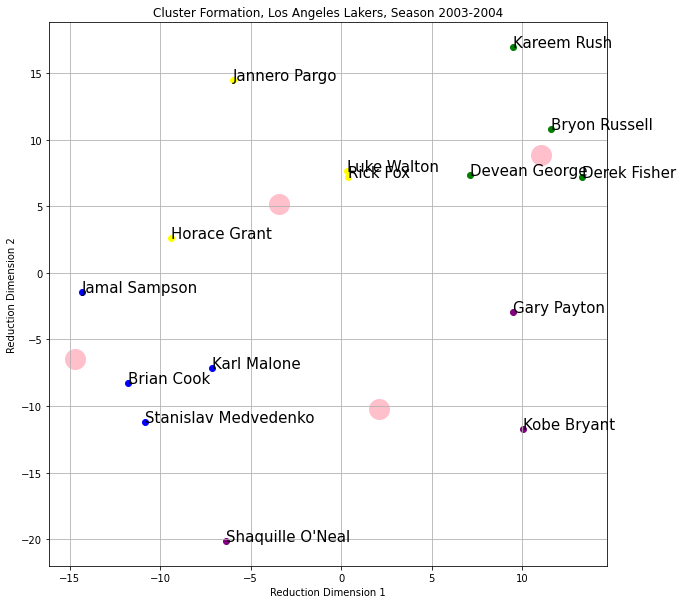

In [ ]:
colour = [ 'purple', 'purple', 'purple',  'blue', 'blue',
          'blue', 'blue', 'green',
          'green', 'green', 'green', 'yellow', 'yellow', 'yellow', 'yellow']
frame = newsim.Ateam(teamname="LAL")

koord = newsim.CalculateclusterCenres()
print(koord[0,:] )

names = frame['name'].tolist()
dim1 = frame['dimension 1'].tolist()
dim2 = frame['dimension 2'].tolist()
labels = frame['label'].tolist()

l = len(names)
print(l)
plt.figure(figsize=(10, 10))
for i in range(4):
   plt.scatter(koord[0, i], koord[1, i], color = 'pink', s= 400)

for i in range(l):
  plt.scatter( dim1[i], dim2[i], color = colour[i])
  plt.text(dim1[i], dim2[i], names[i], fontsize=15)
  

plt.grid(True)
plt.title('Cluster Formation, Los Angeles Lakers, Season 2003-2004')
plt.xlabel("Reduction Dimension 1")
plt.ylabel("Reduction Dimension 2")

array([[ 11.89629  ,  -2.37604  ,   7.2396226, -11.9840975],
       [ -1.3579046, -11.259711 ,  12.078534 ,   0.51584  ]],
      dtype=float32)

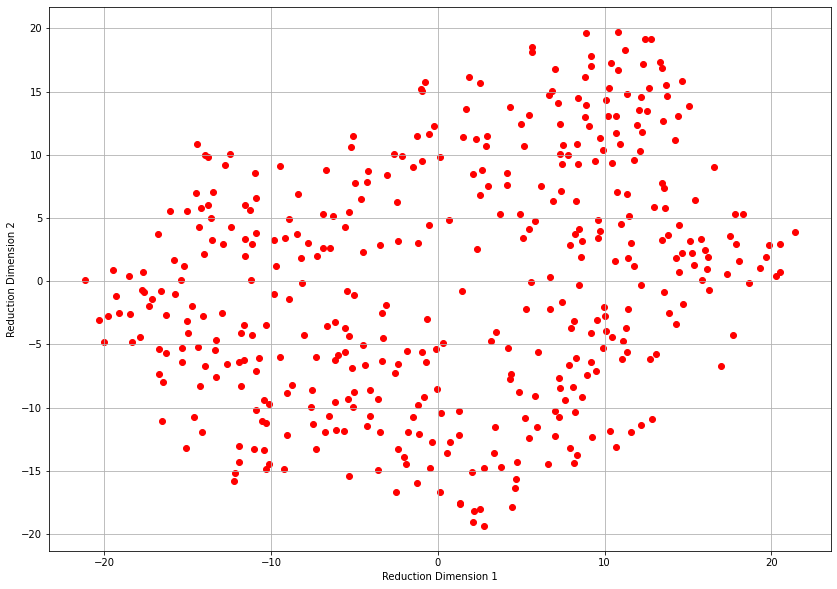

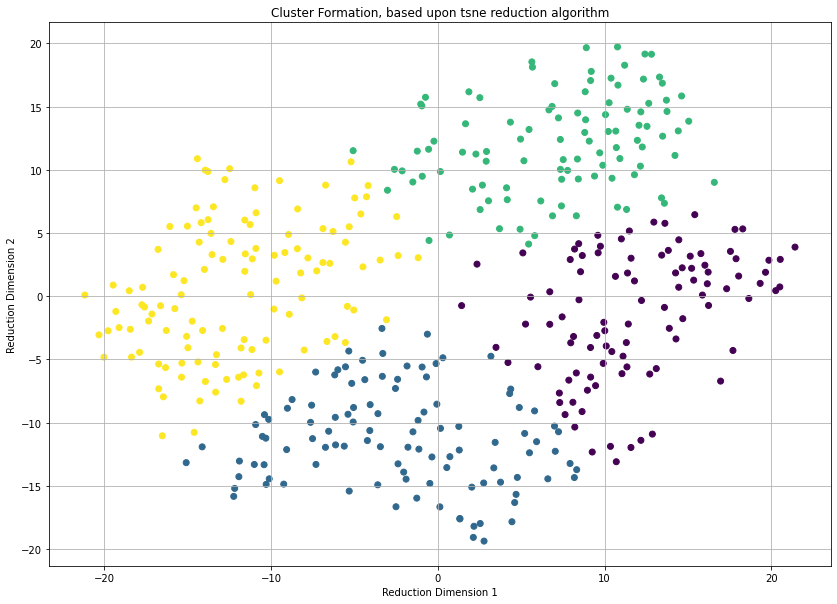

In [ ]:
df_season0304 = pd.read_csv('/content/drive/MyDrive/SportAnalytics/Season_99_00/100poss.csv')
newsim =  tsneKmeanClustering(NumberofClusters=4, dataframeX = df_season0304)
newsim.Dimreduction()
newsim.Kmeancluster()
newsim.CalculateclusterCenres()

[-13.1169615  -6.3508735   3.553582   14.367838 ]
13


Text(0, 0.5, 'Reduction Dimension 2')

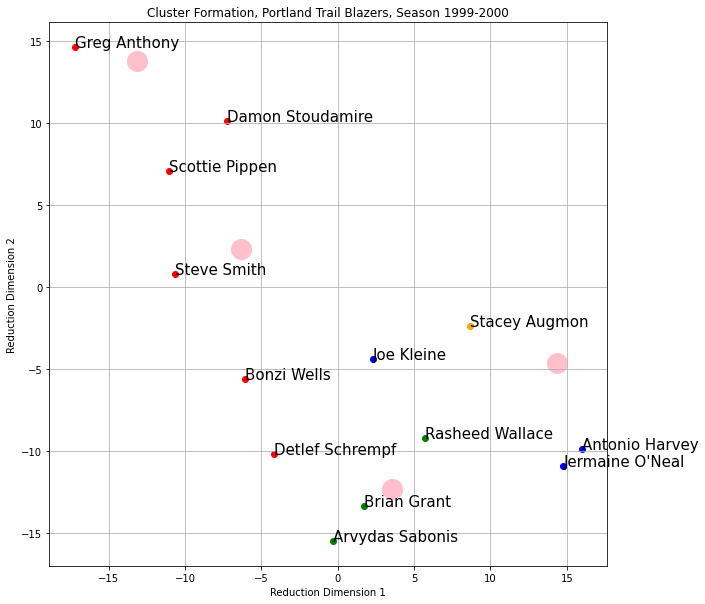

In [ ]:
newsim.Ateam(teamname="Portland")
colour = ['red', 'red', 'red', 'red', 'red', 'red',  'green', 'green', 'green',  
         'blue', 'blue', 'blue', 'orange']

frame = newsim.Ateam(teamname="Portland")

koord = newsim.CalculateclusterCenres()
print(koord[0,:] )

names = frame['name'].tolist()
dim1 = frame['dimension 1'].tolist()
dim2 = frame['dimension 2'].tolist()
labels = frame['label'].tolist()

l = len(names)
print(l)
plt.figure(figsize=(10, 10))
for i in range(4):
   plt.scatter(koord[0, i], koord[1, i], color = 'pink', s= 400)

for i in range(l):
  plt.scatter( dim1[i], dim2[i], color = colour[i])
  plt.text(dim1[i], dim2[i], names[i], fontsize=15)
  

plt.grid(True)
plt.title('Cluster Formation, Portland Trail Blazers, Season 1999-2000')
plt.xlabel("Reduction Dimension 1")
plt.ylabel("Reduction Dimension 2")

In [ ]:
newsim.Ateam(teamname="Portland")

,dimension 1,dimension 2,label,team,name
312,-7.257578,10.130148,0,Portland,Damon Stoudamire
315,-17.229792,14.635507,0,Portland,Greg Anthony
317,-6.098734,-5.584948,1,Portland,Bonzi Wells
310,-11.056174,7.048993,1,Portland,Scottie Pippen
311,-10.648012,0.779461,1,Portland,Steve Smith
314,-4.159503,-10.151945,2,Portland,Detlef Schrempf
313,-0.341196,-15.466590,2,Portland,Arvydas Sabonis
316,1.691273,-13.339595,2,Portland,Brian Grant
309,5.700430,-9.174640,2,Portland,Rasheed Wallace
321,2.301452,-4.381922,2,Portland,Joe Kleine


In [ ]:
newsim.Ateam(teamname="Detroit") 


,dimension 1,dimension 2,label,team,name
112,-17.108807,14.979776,0,Detroit,Lindsey Hunter
116,-15.593247,21.342670,0,Detroit,Terry Mills
118,-15.423659,12.233146,0,Detroit,John Crotty
125,-19.879110,5.188400,0,Detroit,Marcus Brown
119,-4.996155,19.819639,0,Detroit,Jud Buechler
111,-1.679551,-0.071335,1,Detroit,Jerry Stackhouse
117,-12.436631,3.949994,1,Detroit,Michael Curry
113,-1.174504,-2.935798,1,Detroit,Grant Hill
114,0.996821,-11.264598,2,Detroit,Christian Laettner
115,15.597355,-7.399143,3,Detroit,Jerome Williams


[ 10.732233    0.5731864  -2.4862344 -12.9042   ]
13


Text(0, 0.5, 'Reduction Dimension 2')

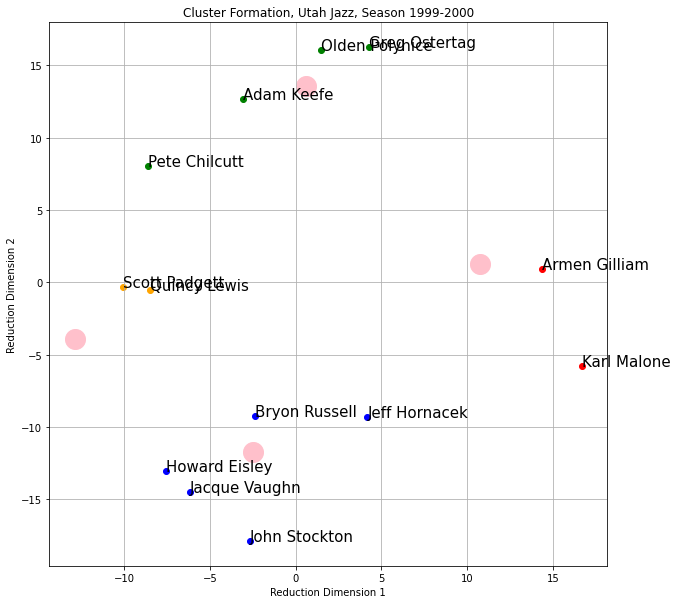

In [ ]:
newsim.Ateam(teamname="Utah")
colour = ['red', 'red', 'green', 'green', 'green', 'green', 'blue',
          'blue', 'blue', 'blue', 'blue', 'orange', 'orange'] 
      
frame = newsim.Ateam(teamname="Utah")

koord = newsim.CalculateclusterCenres()
print(koord[0,:] )

names = frame['name'].tolist()
dim1 = frame['dimension 1'].tolist()
dim2 = frame['dimension 2'].tolist()
labels = frame['label'].tolist()

l = len(names)
print(l)
plt.figure(figsize=(10, 10))
for i in range(4):
   plt.scatter(koord[0, i], koord[1, i], color = 'pink', s= 400)

for i in range(l):
  plt.scatter( dim1[i], dim2[i], color = colour[i])
  plt.text(dim1[i], dim2[i], names[i], fontsize=15)
  

plt.grid(True)
plt.title('Cluster Formation, Utah Jazz, Season 1999-2000')
plt.xlabel("Reduction Dimension 1")
plt.ylabel("Reduction Dimension 2")

[ 10.732233    0.5731864  -2.4862344 -12.9042   ]
14


Text(0, 0.5, 'Reduction Dimension 2')

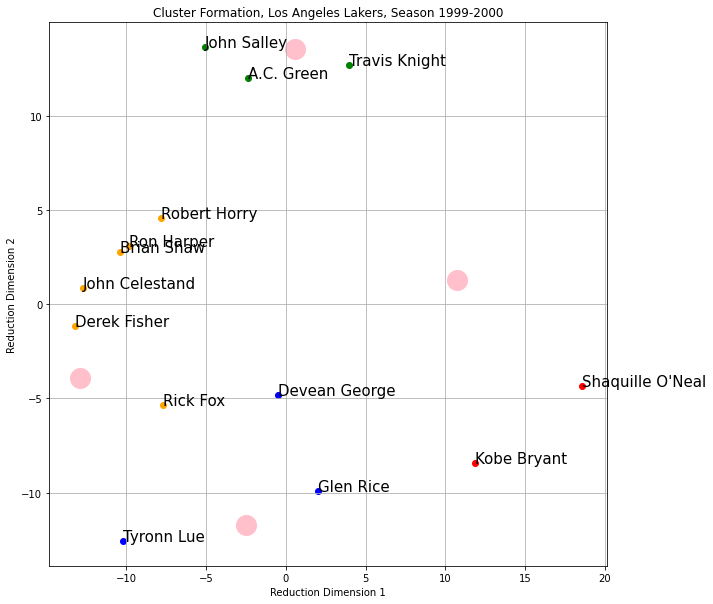

In [ ]:
newsim.Ateam(teamname="LALakers")
colour = ['red', 'red', 'green', 'green', 'green', 'blue',
          'blue', 'blue', 'orange', 'orange',
          'orange', 'orange', 'orange', 'orange'] 
frame = newsim.Ateam(teamname="LALakers")

koord = newsim.CalculateclusterCenres()
print(koord[0,:] )

names = frame['name'].tolist()
dim1 = frame['dimension 1'].tolist()
dim2 = frame['dimension 2'].tolist()
labels = frame['label'].tolist()

l = len(names)
print(l)
plt.figure(figsize=(10, 10))
for i in range(4):
   plt.scatter(koord[0, i], koord[1, i], color = 'pink', s= 400)

for i in range(l):
  plt.scatter( dim1[i], dim2[i], color = colour[i])
  plt.text(dim1[i], dim2[i], names[i], fontsize=15)
  

plt.grid(True)
plt.title('Cluster Formation, Los Angeles Lakers, Season 1999-2000')
plt.xlabel("Reduction Dimension 1")
plt.ylabel("Reduction Dimension 2")

array([[ -4.357903 ,  14.163872 ,   4.677692 ,  -8.981404 ],
       [  3.0717716,  -8.669444 , -16.017979 ,  20.022684 ]],
      dtype=float32)

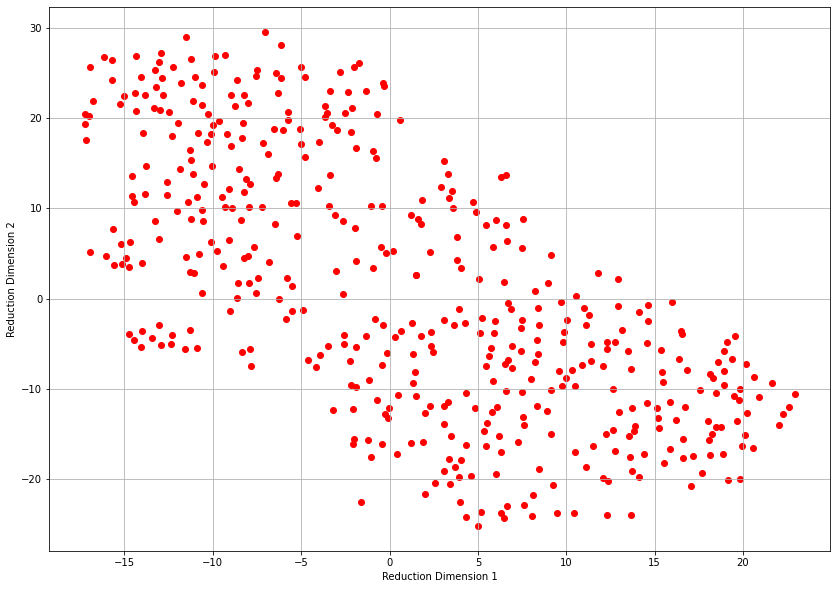

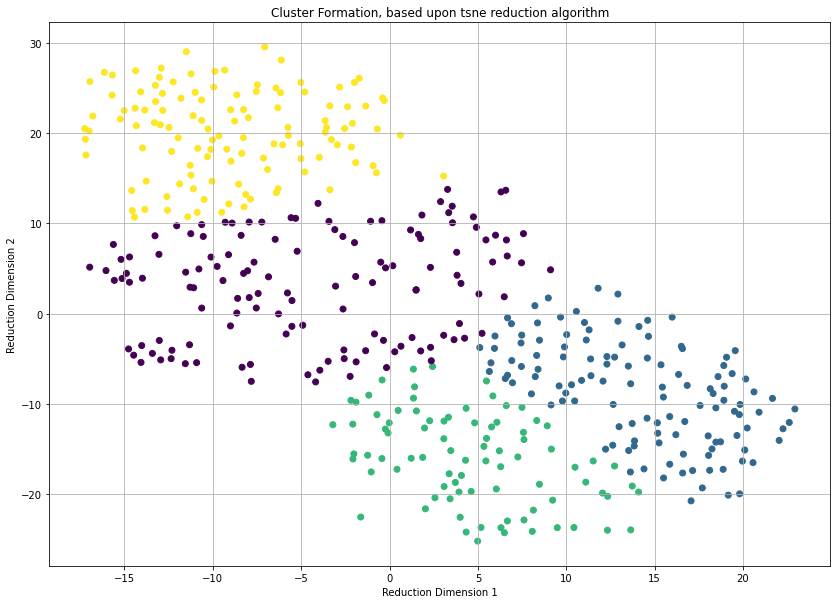

In [ ]:
df_season0506 = pd.read_csv('/content/drive/MyDrive/SportAnalytics/season20052006/20052006100poss3.csv')
newsim =  tsneKmeanClustering(NumberofClusters=4, dataframeX = df_season0506)
newsim.Dimreduction()
newsim.Kmeancluster()
newsim.CalculateclusterCenres()

Text(0.5, 1.0, 'Average Distance between Each Play and the Centroids, Season 2003/2004')

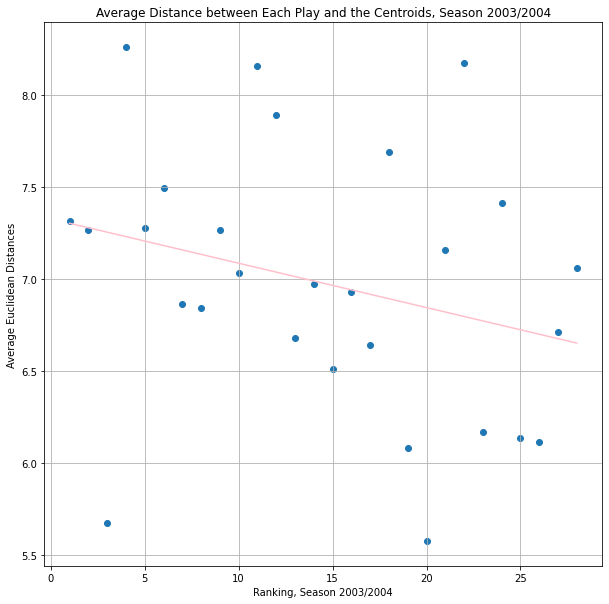

In [ ]:
from sklearn.linear_model import LinearRegression 

team_ranking=[  'Boston', 'Dallas', 'New Orleans', 'Indiana', 'Minnesota', 'New York', 'New Jersey', 'Miami', 'Detroit', 'LAL',
              'Denver',    'Houston', 'Toronto', 'Memphis', 'Utah', 'Portland', 'Golden State',   'Chicago', 'Seattle',  'Sacramento', 
             'Cleveland',  'Atlanta','LAC',  'Washington',  'Phoenix', 'Milwaukee', 'San Antonio',
              'Orlando']

rank = []
diffpath = [] 

L = len(team_ranking)

for i in range(L): 
  rank.append(i+1)
  current_team = team_ranking[i]
  # to calculate the average distance
  tempaverage = newsim.AverageEuclidean(teamname = current_team)
  diffpath.append(tempaverage)

rankarray = np.array(rank).reshape((-1, 1))
diffarray = np.array(diffpath)
reg = LinearRegression().fit(rankarray, diffarray)

#LinearRegression().predict(rankarray)
ypred = reg.predict(rankarray)

plt.figure(figsize=(10, 10))
plt.scatter(rank, diffpath)
plt.plot( rank, ypred, color='pink')
plt.xlabel("Ranking, Season 2003/2004")
plt.ylabel("Average Euclidean Distances")
plt.grid(True)
plt.title('Average Distance between Each Play and the Centroids, Season 2003/2004')

array([[  5.663906 ,  -9.519125 , -18.873545 ,  12.832623 ],
       [-11.307856 ,  -2.4978454,  10.209947 ,   1.9090215]],
      dtype=float32)

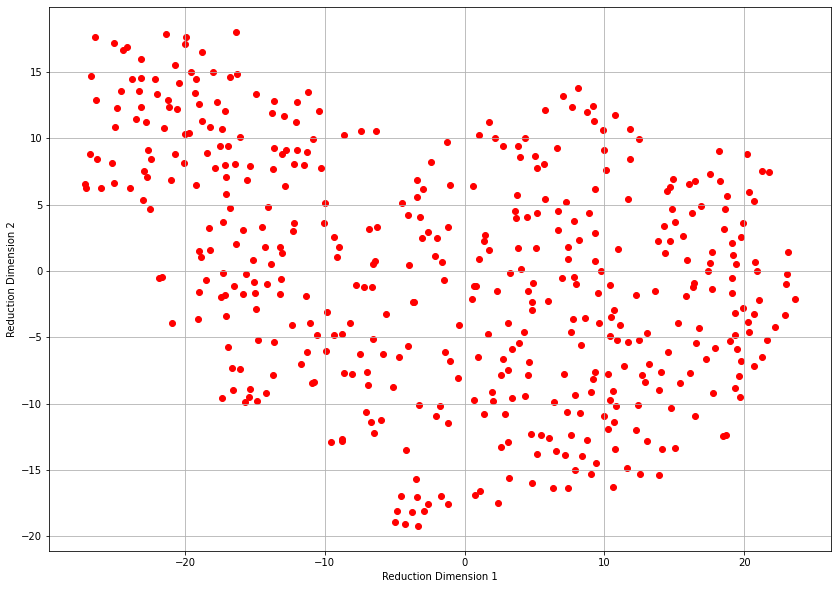

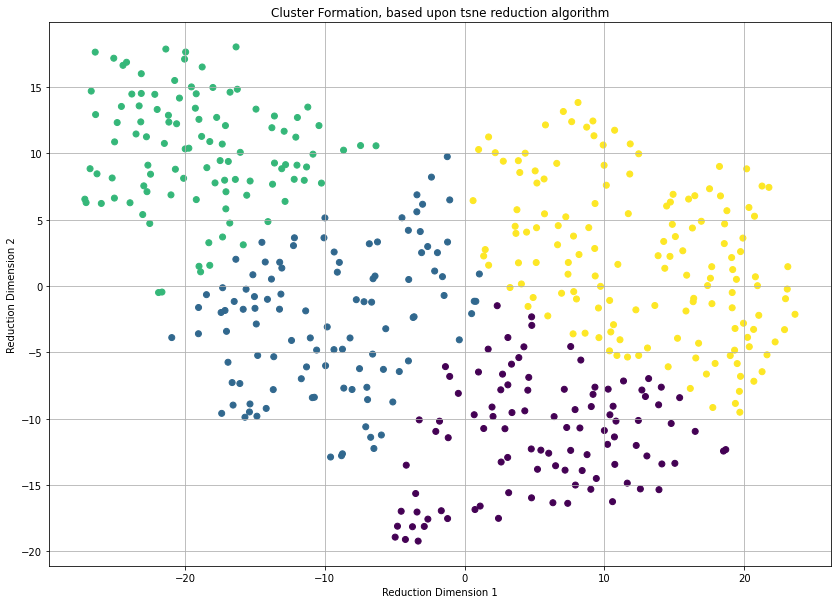

In [ ]:
df_season0506 = pd.read_csv('/content/drive/MyDrive/SportAnalytics/season20052006/20052006100posscluster.csv')
newsim =  tsneKmeanClustering(NumberofClusters=4, dataframeX =df_season0506)
newsim.Dimreduction()
newsim.Kmeancluster()
newsim.CalculateclusterCenres()

In [ ]:
df_season0506.shape

(456, 32)

Miami
Dallas
Detroit
Phoenix
Cleveland
New Jersey
San Antonio
Philadelphia
LAC
Washington
Milwaukee
Washington
Cleveland
Chicago
Indiana
Memphis
Denver
LAC
Sacramento
Utah
New Orleans
Boston
Atlanta
Minnesota
Milwaukee
Seattle
Golden State
New York
Houston
Portland


Text(0.5, 1.0, 'Average Distance between Each Player and the Centroids, Season 2005/2006')

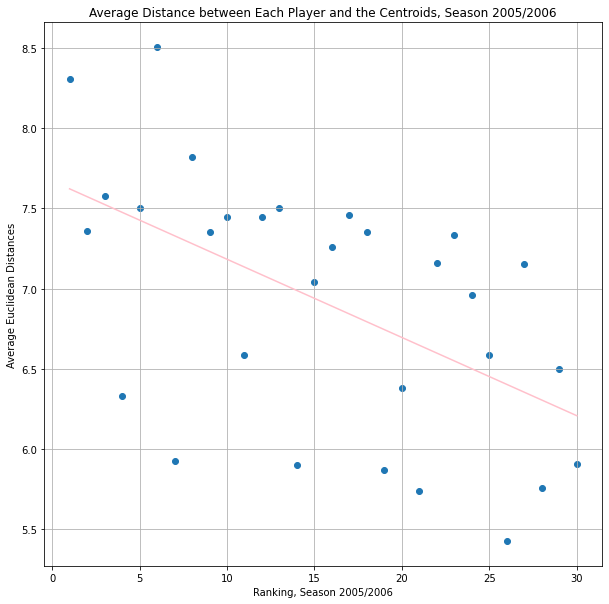

In [ ]:
from sklearn.linear_model import LinearRegression 

team_ranking=['Miami', 'Dallas', 'Detroit', 'Phoenix', 'Cleveland', 'New Jersey', 'San Antonio',
              'Philadelphia', 'LAC', 'Washington', 'Milwaukee', 'Washington', 'Cleveland', 'Chicago', 
              'Indiana', 'Memphis', 'Denver', 'LAC', 'Sacramento', 'Utah', 'New Orleans',  'Boston',  'Atlanta',
              'Minnesota', 'Milwaukee', 'Seattle', 'Golden State',  'New York', 'Houston', 'Portland'] 

rank = []
diffpath = [] 

L = len(team_ranking)

for i in range(L): 
  rank.append(i+1)
  current_team = team_ranking[i]
  print(current_team)
  # to calculate the average distance
  tempaverage = newsim.AverageEuclidean(teamname = current_team)
  diffpath.append(tempaverage)

rankarray = np.array(rank).reshape((-1, 1))
diffarray = np.array(diffpath)
reg = LinearRegression().fit(rankarray, diffarray)

#LinearRegression().predict(rankarray)
ypred = reg.predict(rankarray)

plt.figure(figsize=(10, 10))
plt.scatter(rank, diffpath)
plt.plot( rank, ypred, color='pink')
plt.xlabel("Ranking, Season 2005/2006")
plt.ylabel("Average Euclidean Distances")
plt.grid(True)
plt.title('Average Distance between Each Player and the Centroids, Season 2005/2006')

In [ ]:
newsim.Ateam(teamname="Portland")

,dimension 1,dimension 2,label,team,name
354,10.389085,-9.711931,0,Portland,Sebastian Telfair
365,13.897209,-15.354235,0,Portland,Voshon Lenard
352,1.364790,-10.745427,0,Portland,Juan Dixon
359,-9.943695,-6.013919,1,Portland,Darius Miles
356,-3.418114,5.583361,1,Portland,Viktor Khryapa
351,-10.892300,-8.419546,1,Portland,Zach Randolph
360,-7.195447,-1.192274,1,Portland,Travis Outlaw
362,-14.800391,-5.241799,1,Portland,Ruben Patterson
363,-18.999962,12.548935,2,Portland,Brian Skinner
366,-19.536736,14.993234,2,Portland,Ha Seung-Jin


[  5.663906  -9.519125 -18.873545  12.832623]
17


Text(0, 0.5, 'Reduction Dimension 2')

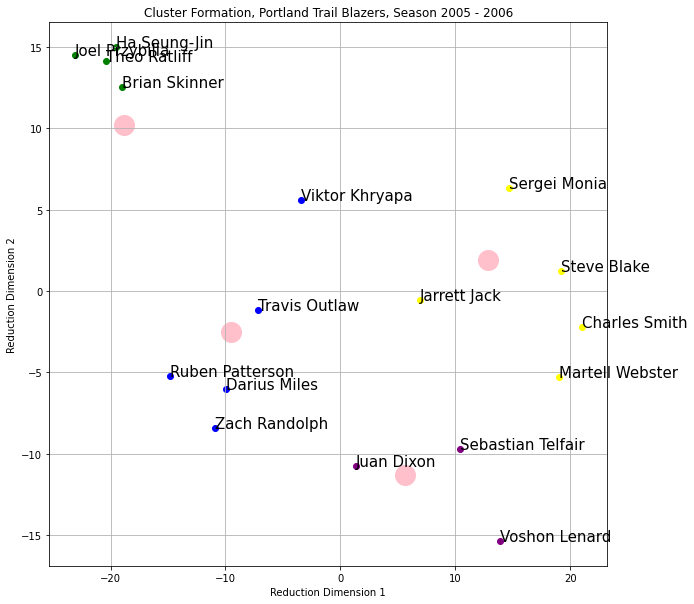

In [ ]:
colour =['purple', 'purple', 'purple', 'blue', 'blue','blue','blue',
         'blue', 'green', 'green', 'green', 'green', 'yellow', 'yellow',
         'yellow','yellow','yellow']  
      
frame = newsim.Ateam(teamname="Portland")

koord = newsim.CalculateclusterCenres()
print(koord[0,:] )

names = frame['name'].tolist()
dim1 = frame['dimension 1'].tolist()
dim2 = frame['dimension 2'].tolist()
labels = frame['label'].tolist()

l = len(names)
print(l)
plt.figure(figsize=(10, 10))
for i in range(4):
   plt.scatter(koord[0, i], koord[1, i], color = 'pink', s= 400)

for i in range(l):
  plt.scatter( dim1[i], dim2[i], color = colour[i])
  plt.text(dim1[i], dim2[i], names[i], fontsize=15)
  

plt.grid(True)
plt.title('Cluster Formation, Portland Trail Blazers, Season 2005 - 2006')
plt.xlabel("Reduction Dimension 1")
plt.ylabel("Reduction Dimension 2")

In [ ]:
newsim.Ateam(teamname="Phoenix")

,dimension 1,dimension 2,label,team,name
341,5.210409,-13.816968,0,Phoenix,Steve Nash
343,8.243411,-10.705667,0,Phoenix,Leandro Barbosa
344,10.576539,-16.257349,0,Phoenix,Eddie House
350,-9.103554,1.033517,1,Phoenix,Nikoloz Tskitishvili
348,-9.825747,-3.091036,1,Phoenix,Pat Burke
338,-5.808921,-6.290624,1,Phoenix,Shawn Marion
340,-9.586424,-12.894669,1,Phoenix,Boris Diaw
345,-15.581518,6.831636,2,Phoenix,Kurt Thomas
349,-8.658188,10.227785,2,Phoenix,Brian Grant
347,14.906580,6.900971,3,Phoenix,Jim Jackson


13


Text(0, 0.5, 'Reduction Dimension 2')

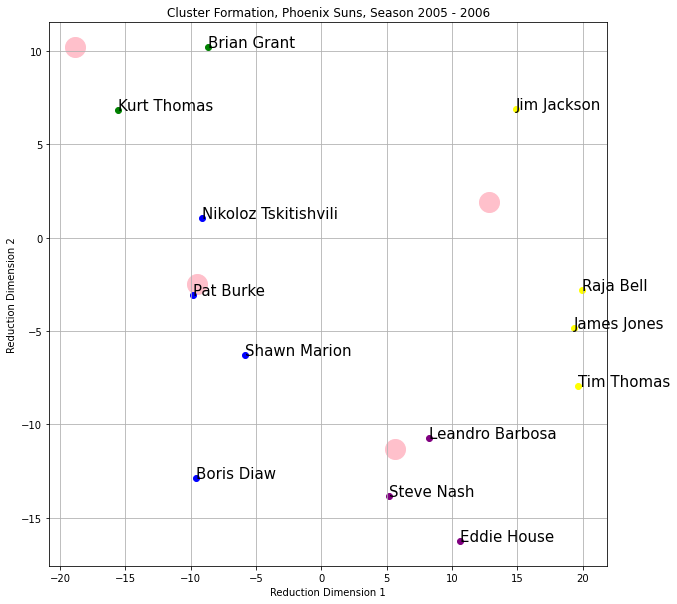

In [ ]:
colour = ['purple', 'purple', 'purple', 'blue', 'blue', 'blue', 'blue',
          'green', 'green', 'yellow', 
          'yellow', 'yellow', 'yellow', 'yellow']

frame = newsim.Ateam(teamname="Phoenix")

koord = newsim.CalculateclusterCenres()

names = frame['name'].tolist()
dim1 = frame['dimension 1'].tolist()
dim2 = frame['dimension 2'].tolist()
labels = frame['label'].tolist()

l = len(names)
print(l)
plt.figure(figsize=(10, 10))
for i in range(4):
   plt.scatter(koord[0, i], koord[1, i], color = 'pink', s= 400)

for i in range(l):
  plt.scatter( dim1[i], dim2[i], color = colour[i])
  plt.text(dim1[i], dim2[i], names[i], fontsize=15)
  

plt.grid(True)
plt.title('Cluster Formation, Phoenix Suns, Season 2005 - 2006')
plt.xlabel("Reduction Dimension 1")
plt.ylabel("Reduction Dimension 2")